# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df["Cylinder"].value_counts()

4    394
6    310
8    100
Name: Cylinder, dtype: int64

In [6]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [7]:
df.loc[df.duplicated()]

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather


In [8]:
df=df.drop_duplicates()

# **Tasks, Part 1**

In [131]:
x=df[["Mileage"]]
y=df["Price"]

In [132]:
model=linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [133]:
print("Linear Regression equation : y = {:.3f} x + {:.3f}".format(model.coef_[0],model.intercept_))

Linear Regression equation : y = -0.173 x + 24764.559


In [134]:
y_pred=(-0.1725205*x)+24764.5590
y_pred

,Mileage
0,23346.267970
1,23188.584233
2,22487.978482
3,21945.228989
4,21343.132444
...,...
799,21964.723806
800,21470.280053
801,21230.649078
802,20282.648930


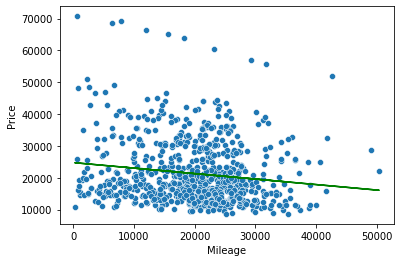

In [135]:
import seaborn as sns
sns.scatterplot(x="Mileage",y="Price",data=df)
plt.plot(x,y_pred,color="green")

In [136]:
df[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [137]:
model.score(x,y)

0.02046344732348926

There is no linear relationship between Price and Mileage.We can drop while predicting the Price.

# Tasks, Part 2

In [6]:
x=df[['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
y=df["Price"]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

In [158]:
len(x_train)

643

In [8]:
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [9]:
y_predicted=lreg.predict(x_test)
y_predicted

array([21065.11574743, 18458.25621786, 31217.74382358, 26882.38523062,
       31554.98123017, 11425.38556634,  9380.78357891, 24475.75014276,
       21812.22422208, 18173.30390543, 23321.59636872, 19310.07177814,
       24716.67382831, 24287.36000429, 25465.0637773 , 25591.49710057,
       13353.86790177, 25686.93755556, 26599.93059561, 12619.54001893,
       21934.58010447, 26958.79238752, 22481.33238579, 23964.76297383,
       11241.1707769 , 17442.69640113, 18744.4474883 , 21423.81278251,
       23514.24673295, 32113.95347261, 22764.93764614, 26639.0148953 ,
        9881.79921834, 18666.28890875, 29892.14387332, 23479.03319772,
       15218.64151111, 18229.99129582,  8644.96613715, 13818.02325276,
       17360.95974957, 11373.34057416, 24945.80283379, 21200.79924681,
       16314.22304029, 18697.61567037, 21665.60408312,  9753.95606159,
       12363.06557812, 20022.67452981, 19286.75550495, 23767.00941797,
       22437.85304476, 18819.61680347, 18917.8986658 , 14420.8304973 ,
      

In [10]:
lreg.coef_

array([-1.73451178e-01,  3.60319639e+03, -5.48327318e+02, -1.42230548e+03,
        6.22060843e+03, -1.70813461e+03,  2.78770438e+03])

In [11]:
lreg.intercept_

6854.414567867725

In [12]:
check=pd.DataFrame({'Actual value': y_test, 'Predicted value': y_predicted})
check.head()

,Actual value,Predicted value
256,13141.047950,21065.115747
203,10106.016431,18458.256218
484,21982.647708,31217.743824
431,18324.831925,26882.385231
348,36970.898047,31554.981230


In [13]:
lreg.score(x_test,y_test)

0.46360211981206156

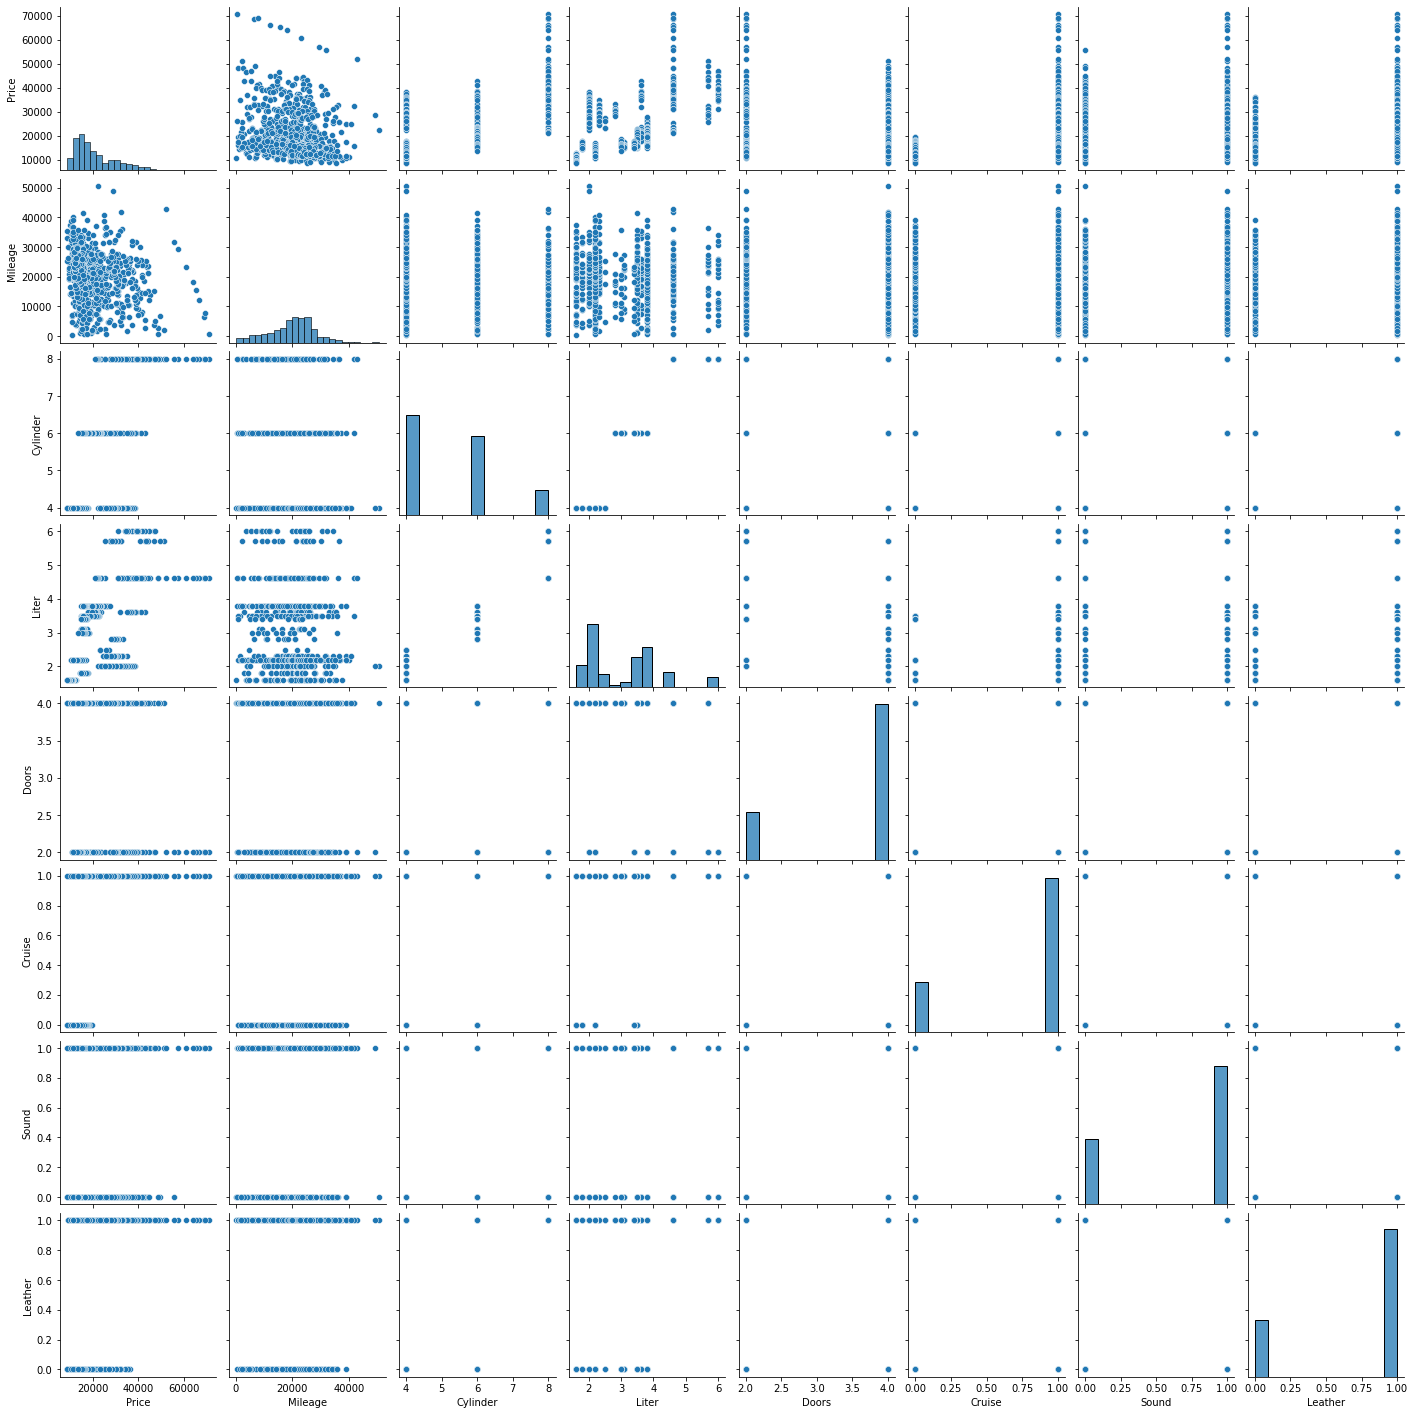

In [171]:
sns.pairplot(df)

In [22]:
cor=df[['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather','Price']].corr()

In [41]:
df1=cor.loc["Price",:'Leather'].to_frame()
df1.rename({"Price":"Corr"},axis="columns",inplace=True)
df1.reset_index(level=0,inplace=True)
df1

,index,Corr
0,Mileage,-0.143051
1,Cylinder,0.569086
2,Liter,0.558146
3,Doors,-0.138750
4,Cruise,0.430851
5,Sound,-0.124348
6,Leather,0.157197


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


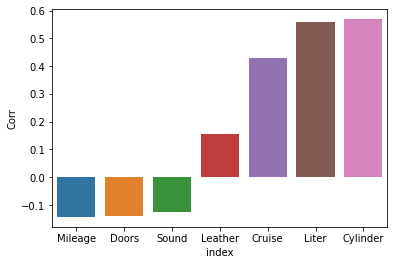

In [48]:
import seaborn as sns
df1=df1.sort_values(by="Corr")
sns.barplot(df1["index"],df1["Corr"])

In [3]:
x=df[['Cylinder','Liter','Cruise','Leather']]
y=df["Price"]

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

In [124]:
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [125]:
reg.score(x_test,y_test)

0.41271949428769983

In [126]:
y_pre=reg.predict(x_test)
dff=pd.DataFrame({"Actual":y_test,"Predicted":y_pre})
dff

,Actual,Predicted
256,13141.047950,19424.932855
203,10106.016431,16676.947013
484,21982.647708,32332.754091
431,18324.831925,25903.515798
348,36970.898047,32678.166633
...,...,...
709,26955.041202,19449.605180
312,15128.992236,19424.932855
128,31181.715159,32332.754091
476,21525.339008,25977.532771


It seems Cylinder,Liter,Cruise and Leather are the best combination of features for price prediction.

# Tasks, Hard Mode

In [4]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [5]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [6]:
df["Make"].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [7]:
df["Model"].unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [8]:
df["Type"].unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

In [9]:
df2=df[['Price', 'Make', 'Model', 'Trim', 'Type']]
df2

,Price,Make,Model,Trim,Type
0,17314.103129,Buick,Century,Sedan 4D,Sedan
1,17542.036083,Buick,Century,Sedan 4D,Sedan
2,16218.847862,Buick,Century,Sedan 4D,Sedan
3,16336.913140,Buick,Century,Sedan 4D,Sedan
4,16339.170324,Buick,Century,Sedan 4D,Sedan
...,...,...,...,...,...
799,16507.070267,Saturn,L Series,L300 Sedan 4D,Sedan
800,16175.957604,Saturn,L Series,L300 Sedan 4D,Sedan
801,15731.132897,Saturn,L Series,L300 Sedan 4D,Sedan
802,15118.893228,Saturn,L Series,L300 Sedan 4D,Sedan


In [10]:
dummies = pd.get_dummies(df2[['Make','Model','Trim','Type']])
dummies

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
final=pd.concat([df2,dummies],axis="columns")
final.head()

,Price,Make,Model,Trim,Type,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [12]:
final.drop(['Make','Model','Trim','Type'],axis="columns",inplace=True)
final

,Price,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
x=final.drop(["Price"],axis=1)
y=final["Price"]

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

In [45]:
llreg=linear_model.LinearRegression()
llreg.fit(x_train,y_train)

LinearRegression()

In [46]:
llreg.score(x_test,y_test)

0.9635302196998479

In [47]:
y_pred=llreg.predict(x_test)

In [56]:
def combinations(L):
    if L:
        result=combinations(L[:-1])
        return result+[i+[L[-1]] for i in result]
    else: 
        return [[]]
    
#n=int(input())    
#jlist=list(map(int,input().split(" ")))[:n]
combi=combinations(['Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']) 
combi=combi[1:]
print(combi)

[['Mileage'], ['Make'], ['Mileage', 'Make'], ['Model'], ['Mileage', 'Model'], ['Make', 'Model'], ['Mileage', 'Make', 'Model'], ['Trim'], ['Mileage', 'Trim'], ['Make', 'Trim'], ['Mileage', 'Make', 'Trim'], ['Model', 'Trim'], ['Mileage', 'Model', 'Trim'], ['Make', 'Model', 'Trim'], ['Mileage', 'Make', 'Model', 'Trim'], ['Type'], ['Mileage', 'Type'], ['Make', 'Type'], ['Mileage', 'Make', 'Type'], ['Model', 'Type'], ['Mileage', 'Model', 'Type'], ['Make', 'Model', 'Type'], ['Mileage', 'Make', 'Model', 'Type'], ['Trim', 'Type'], ['Mileage', 'Trim', 'Type'], ['Make', 'Trim', 'Type'], ['Mileage', 'Make', 'Trim', 'Type'], ['Model', 'Trim', 'Type'], ['Mileage', 'Model', 'Trim', 'Type'], ['Make', 'Model', 'Trim', 'Type'], ['Mileage', 'Make', 'Model', 'Trim', 'Type'], ['Cylinder'], ['Mileage', 'Cylinder'], ['Make', 'Cylinder'], ['Mileage', 'Make', 'Cylinder'], ['Model', 'Cylinder'], ['Mileage', 'Model', 'Cylinder'], ['Make', 'Model', 'Cylinder'], ['Mileage', 'Make', 'Model', 'Cylinder'], ['Trim', 

In [70]:
encode=['Make', 'Model', 'Trim', 'Type']
R2_Scores=[]
for i in combi:
  
  x=df[i] 
  y=df['Price'].values 

  #dummy encoding/oneHotEncoding cat variables
  x=pd.get_dummies(x,columns=[k for k in encode if k in x.columns])
  
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

 #model training
  from sklearn.linear_model import LinearRegression
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)

#prediction and score
  y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
  from sklearn import metrics
  R2_Scores.append(metrics.r2_score(y_test,y_pred))

In [71]:
df3 = pd.DataFrame({'Feature_combinations': combi, 'R2_Scores': R2_Scores})
df3

,Feature_combinations,R2_Scores
0,[Mileage],-0.030868
1,[Make],0.706430
2,"[Mileage, Make]",0.626077
3,[Model],0.943478
4,"[Mileage, Model]",0.955879
...,...,...
2042,"[Mileage, Make, Trim, Type, Cylinder, Liter, D...",0.973193
2043,"[Model, Trim, Type, Cylinder, Liter, Doors, Cr...",0.958571
2044,"[Mileage, Model, Trim, Type, Cylinder, Liter, ...",0.989396
2045,"[Make, Model, Trim, Type, Cylinder, Liter, Doo...",0.947238


In [72]:
df3["R2_Scores"].max()

0.9934547626584945

In [73]:
df3['Feature_combinations'][df3['R2_Scores'].argmax()]

['Mileage',
 'Model',
 'Trim',
 'Type',
 'Liter',
 'Doors',
 'Cruise',
 'Sound',
 'Leather']

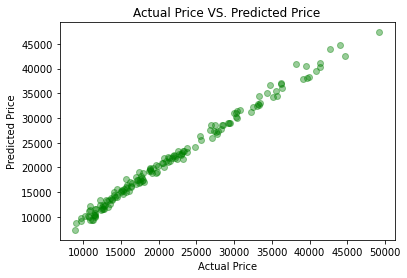

In [79]:
X = df[['Mileage','Model','Trim', 'Type', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
y = df['Price'].values
X = pd.get_dummies(X,columns=[j for j in encode if j in X.columns])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)
lregg = LinearRegression()
lregg.fit(X_train,y_train)
y_predict = lregg.predict(X_test)

plt.scatter(y_test,y_predict,color="Green",alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price VS. Predicted Price")
plt.show()

Overall **'Mileage','Model','Trim', 'Type', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'** are the best combination of features for predicting Price..

